# Logistic Regression

## 1. Exploratory Data Analysis

### 1.1 Import Necessary Libraries

In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from fancyimpute import KNN

### 1.2 Reading and Understanding the Data

In [2]:
# Importing the Dataset
banknote = pd.read_csv('banknote_authentication.csv')

In [3]:
# Show Dataset Shape
banknote.shape

(1372, 5)

In [4]:
# Data types
banknote.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [5]:
# Dataset Overview
banknote.info

<bound method DataFrame.info of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [6]:
# Display the first five (5) rows of the dataset
banknote.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## 2. Data Quality Analysis

### 2.1 Find Missing Values in the Dataset

In [7]:
# Verifying for any missing values in dataset
banknote.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

The data above indicates that the dataset contains no missing values.

### 2.2 Outliers Analysis

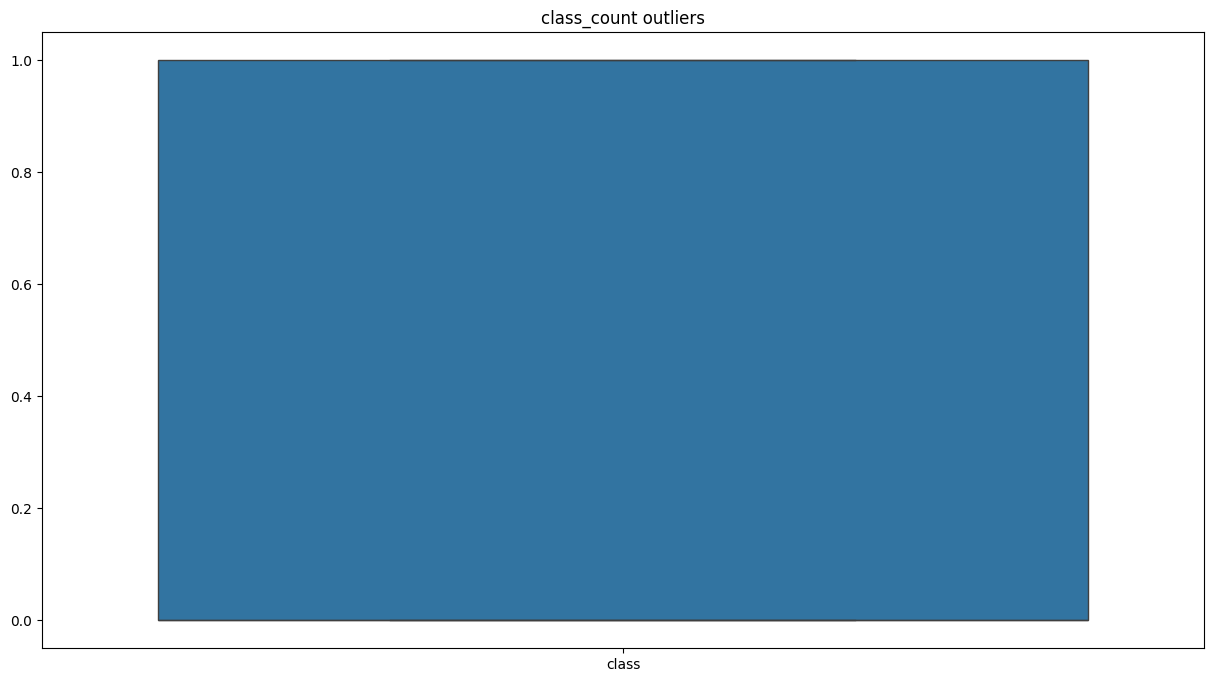

In [8]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=banknote[['class']])
ax.set_title('class_count outliers')
plt.show()

From the box plot, we can observe that there are no significant outliers present in the class variable. The data appears to be well-distributed within the expected range, indicating consistency in the classification of banknotes.

#### Variance, Skewness, Curtosis and Entropy Outliers

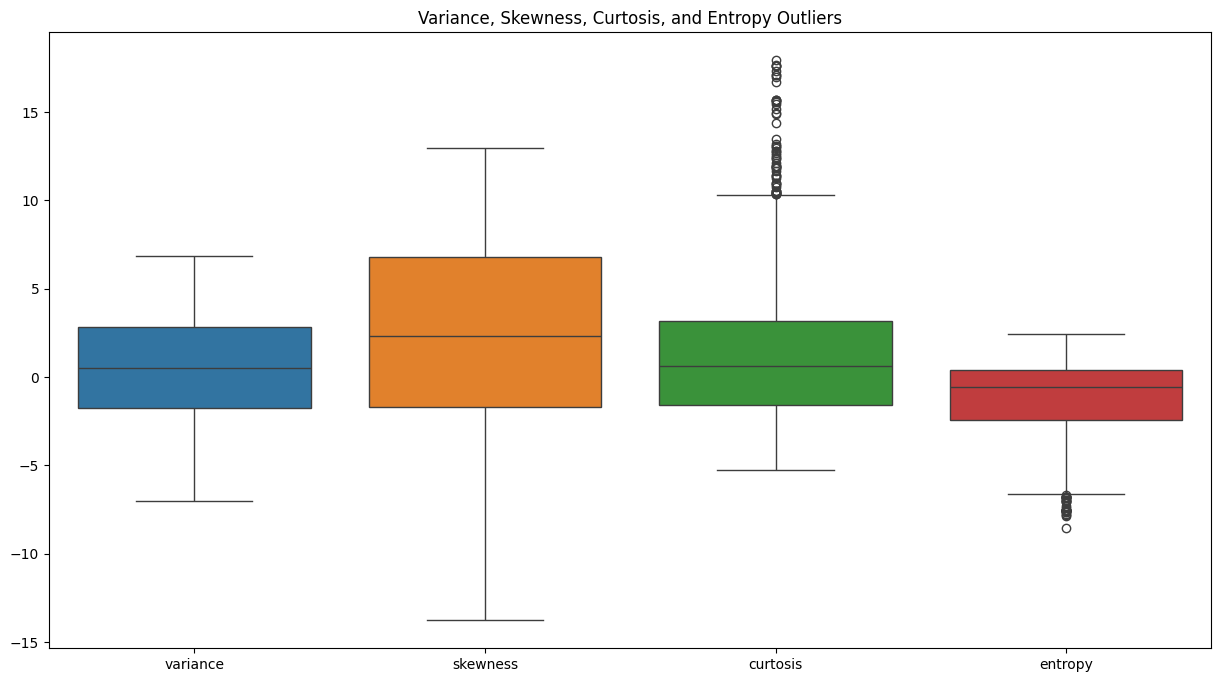

In [9]:
fig,ax=plt.subplots(figsize=(15,8))

#Box Plot for Variance, Skewness, Curtosis, and Entropy Outliers
sns.boxplot(data=banknote[['variance','skewness','curtosis', 'entropy']])
ax.set_title('Variance, Skewness, Curtosis, and Entropy Outliers')
plt.show()

The box plot displays the distribution of the variance, skewness, curtosis, and entropy variables. We can observe that there are a few potential outliers in the variance and skewness variables, indicated by points outside the whiskers of the box plot. However, the curtosis and entropy variables do not exhibit any significant outliers, suggesting that their values are more consistently within the expected range.

#### Imputation of Outliers

In [10]:
from fancyimpute import KNN
#create dataframe for outliers
var_skew=pd.DataFrame(banknote,columns=['variance','skewness'])
 #Cnames for outliers                     
cnames=['variance','skewness']       
                      
for i in cnames:
    q75,q25=np.percentile(var_skew.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    var_skew.loc[var_skew.loc[:,i]<min,:i]=np.nan  #Replace with NA
    var_skew.loc[var_skew.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
var_skew['variance']=var_skew['variance'].fillna(var_skew['variance'].mean())
var_skew['skewness']=var_skew['skewness'].fillna(var_skew['skewness'].mean())

#### Replacing the Original Dataset with Imputated Data

In [11]:
#Replacing the imputated windspeed
banknote['variance']=banknote['variance'].replace(var_skew['variance'])
#Replacing the imputated humidity
banknote['skewness']=banknote['skewness'].replace(var_skew['skewness'])
banknote.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### 2.3 Visualize Pairwise Relationships

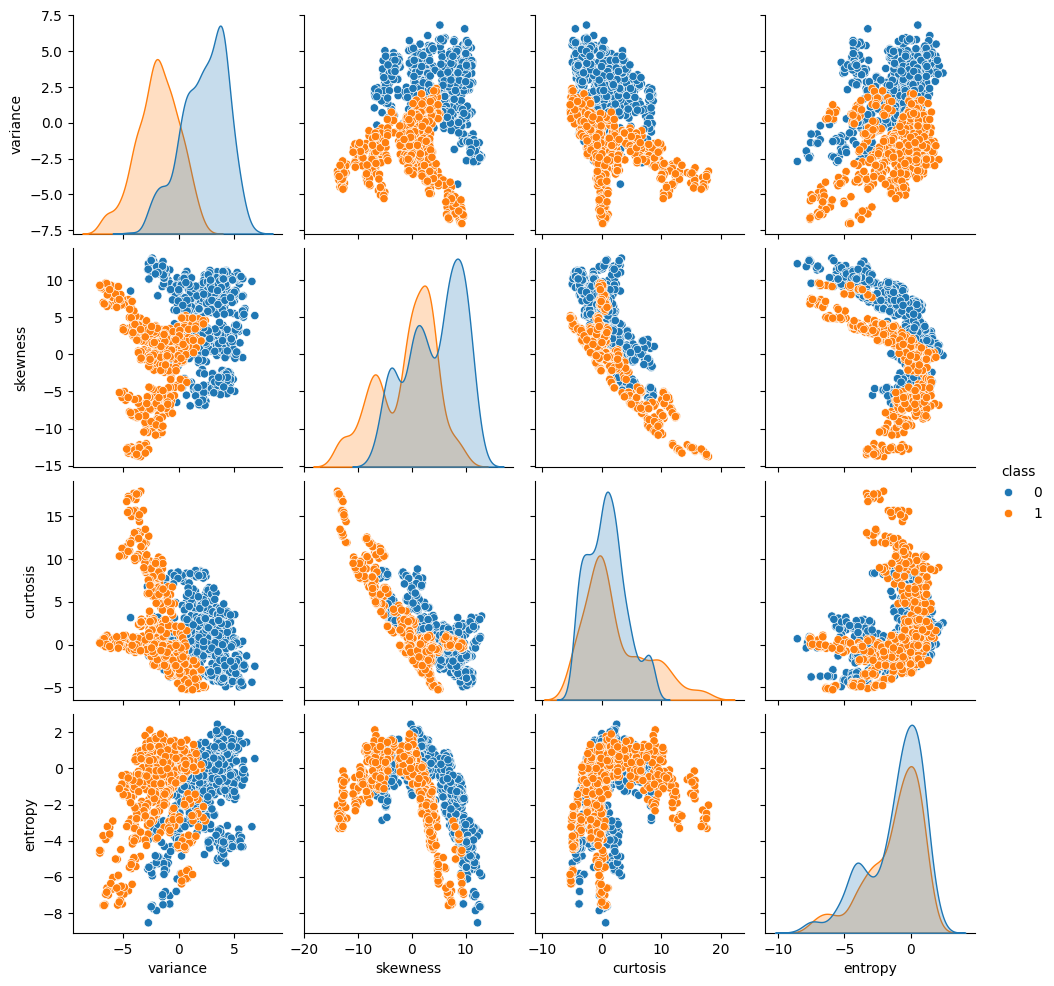

In [12]:
sns.pairplot(banknote, hue='class')
plt.show()

The pairplot displays the relationships between features in the banknote dataset, color-coded by class (authentic or forged). It helps identify patterns and potential clusters, revealing how features like variance, skewness, and curtosis relate to the classification. Clear separations between classes suggest which features contribute most to distinguishing between authentic and forged banknotes.

## 3. Normality Test

### 3.1 Normal Probability Plot for Variance

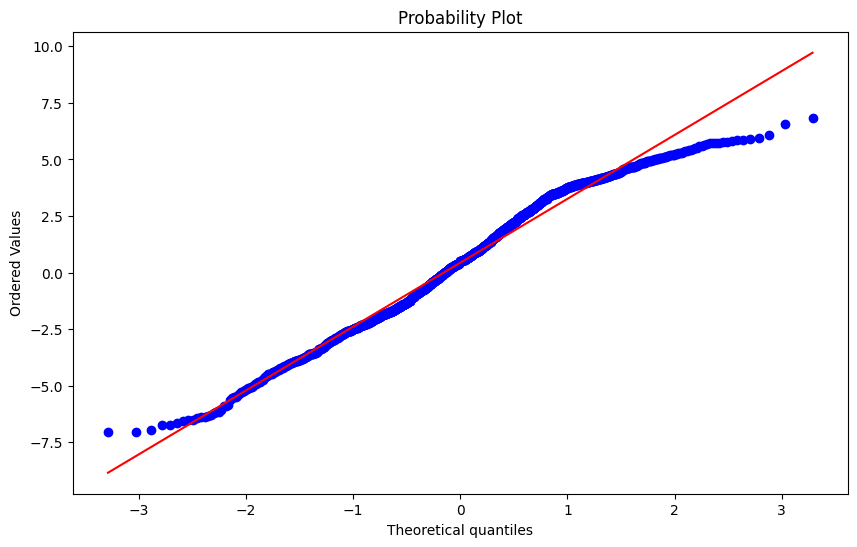

In [13]:
# Normal Probability Plot for 'variance'
fig = plt.figure(figsize=(10,6))
stats.probplot(banknote['variance'].tolist(), dist='norm', plot=plt)
plt.show()


The Normal Probability Plot for 'variance' displays how closely the data follows a normal distribution. If the points closely align along the diagonal line, it suggests that the 'variance' variable is normally distributed. 

### 3.2 Normal Probability Plot for Skewness

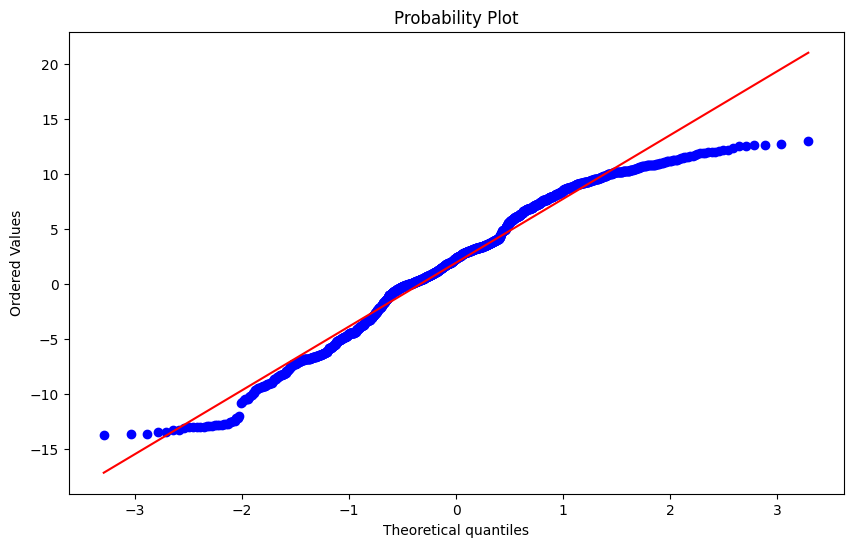

In [14]:
# Normal Probability Plot for 'skewness'
fig = plt.figure(figsize=(10,6))
stats.probplot(banknote['skewness'].tolist(), dist='norm', plot=plt)
plt.show()


The Normal Probability Plot for 'skewness' displays data points against a theoretical normal distribution. If the points closely follow the straight line, it suggests that 'skewness' is approximately normally distributed. 

### 3.3 Normal Probability Plot for Curtosis

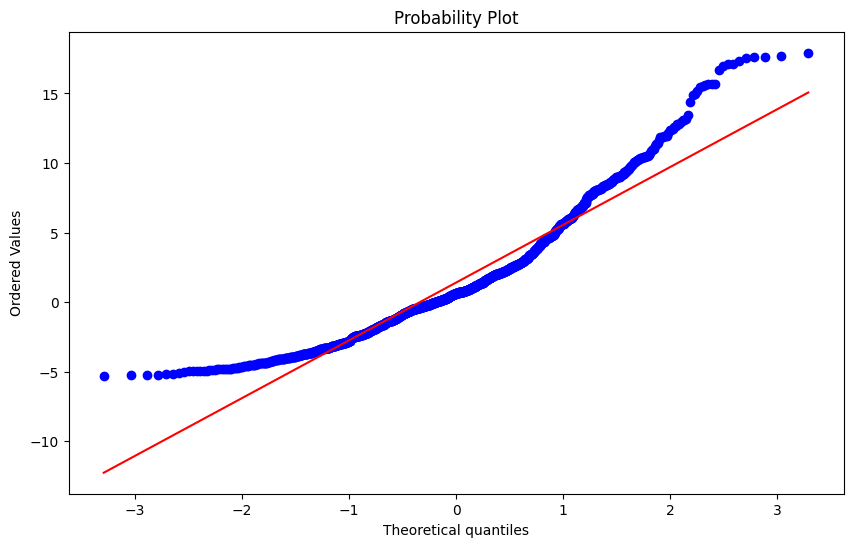

In [15]:
# Normal Probability Plot for 'curtosis'
fig = plt.figure(figsize=(10,6))
stats.probplot(banknote['curtosis'].tolist(), dist='norm', plot=plt)
plt.show()


The normal probability plot for 'curtosis' visually compares the distribution of the 'curtosis' variable to a standard normal distribution. If the points closely follow the straight line, it suggests that 'curtosis' is normally distributed. Deviations from the line indicate departures from normality, which may affect the assumptions of certain statistical analyses.

### 3.4 Normal Probability Plot for Entropy

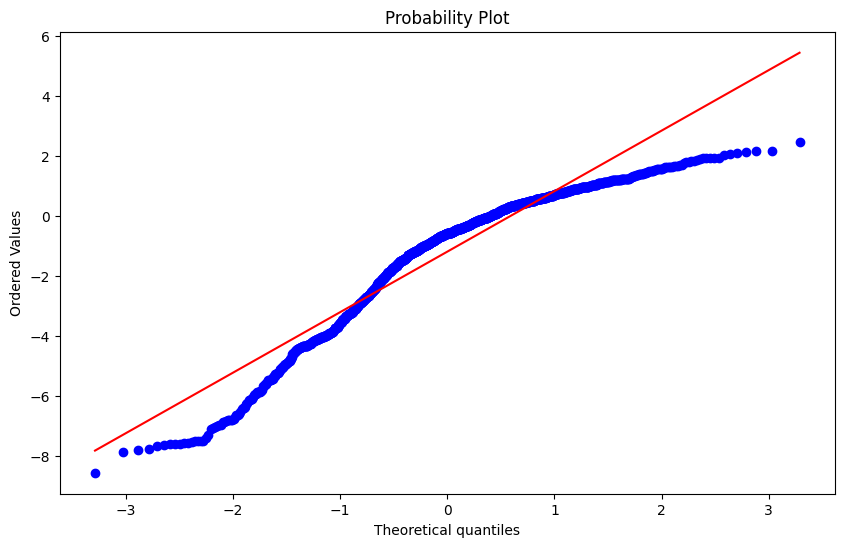

In [16]:
# Normal Probability Plot for 'entropy'
fig = plt.figure(figsize=(10,6))
stats.probplot(banknote['entropy'].tolist(), dist='norm', plot=plt)
plt.show()


The Normal Probability Plot (Q-Q plot) for 'entropy' compares the quantiles of the 'entropy' data to the quantiles of a normal distribution. If the data points closely follow the diagonal line, it indicates that the 'entropy' variable is approximately normally distributed.

## 4. Displaying Attribute Distribution and Trend

### 4.1 Banknote Authentication Trend Based on Variance

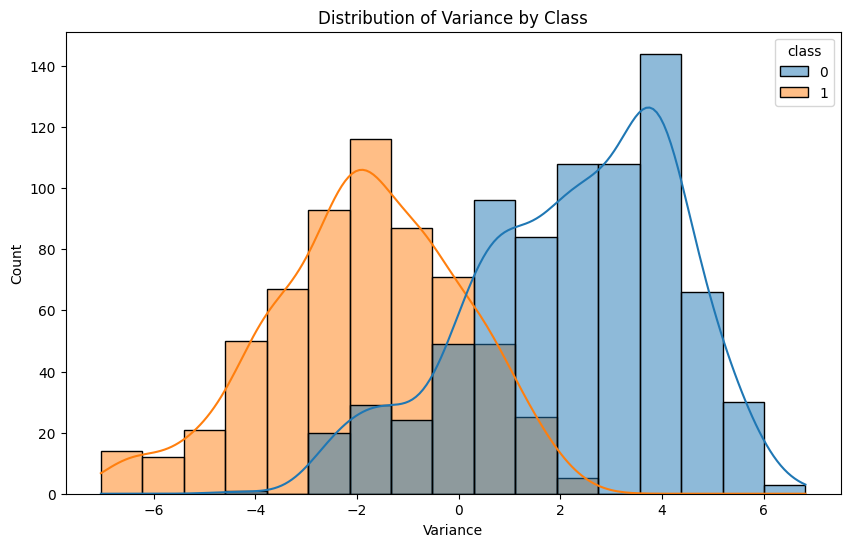

In [17]:
# Assume 'variance' is one of your features and 'class' is the target variable
# Plotting the distribution of 'variance' by class
plt.figure(figsize=(10,6))
sns.histplot(data=banknote, x='variance', hue='class', kde=True)
plt.title('Distribution of Variance by Class')
plt.xlabel('Variance')
plt.ylabel('Count')
plt.show()

The histogram shows the distribution of the variance feature, with different colors representing the two classes of banknotes. It indicates that lower variance values are more common in one class, while higher variance values are associated with the other class, suggesting a potential separation between the two classes based on variance.

### 4.2 Banknote Authentication Trend Based on Skewness

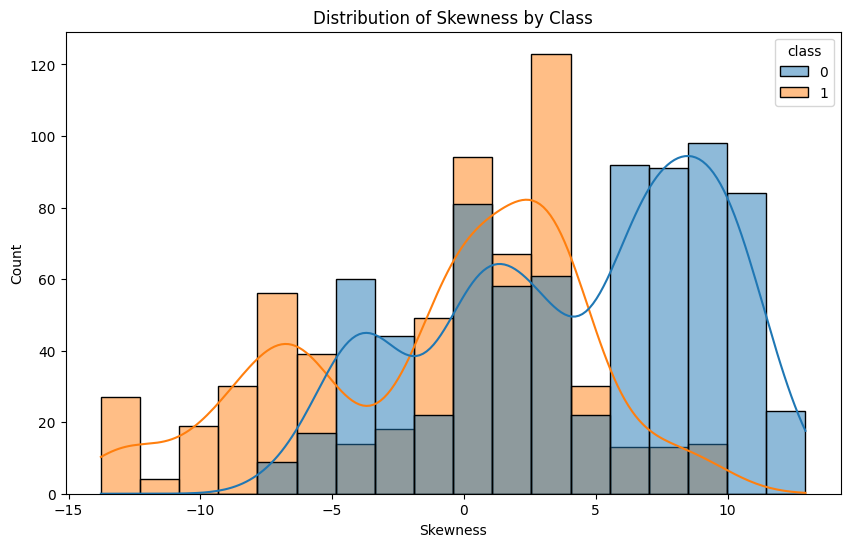

In [18]:
# Assume 'skewness' is one of your features and 'class' is the target variable
# Plotting the distribution of 'skewness' by class
plt.figure(figsize=(10,6))
sns.histplot(data=banknote, x='skewness', hue='class', kde=True)
plt.title('Distribution of Skewness by Class')
plt.xlabel('Skewness')
plt.ylabel('Count')
plt.show()

The histogram shows the distribution of the skewness feature, with distinct patterns for each class. Class 0 exhibits a higher count of lower skewness values, while Class 1 is more concentrated around higher skewness values, indicating a potential separation between the two classes based on this feature.

### 4.3 Banknote Authentication Trend Based on Curtosis

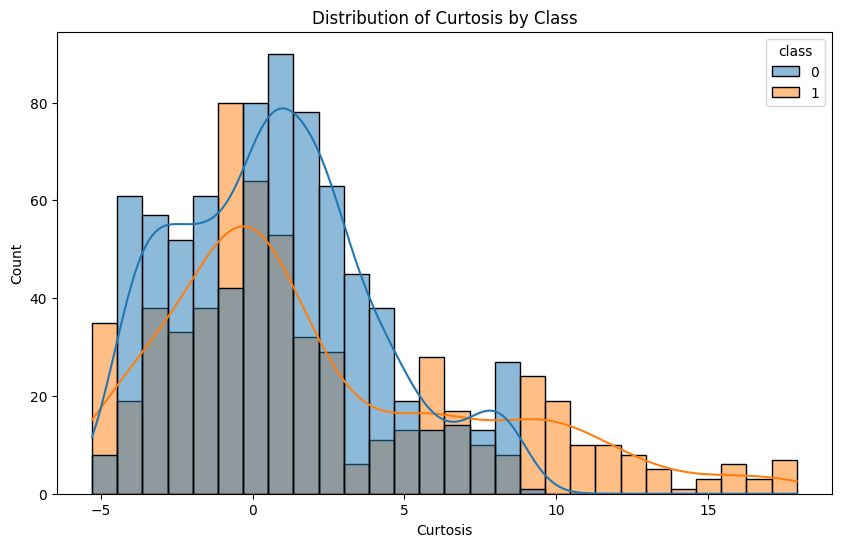

In [19]:
# Assume 'curtosis' is one of your features and 'class' is the target variable
# Plotting the distribution of 'curtosis' by class
plt.figure(figsize=(10,6))
sns.histplot(data=banknote, x='curtosis', hue='class', kde=True)
plt.title('Distribution of Curtosis by Class')
plt.xlabel('Curtosis')
plt.ylabel('Count')
plt.show()

The histogram shows the distribution of the curtosis feature for each class in the dataset. The overlapping density curves indicate that curtosis values differ between the two classes, with distinct peaks suggesting that the classes can be effectively separated based on this feature.

### 4.4 Banknote Authentication Trend Based on Entropy

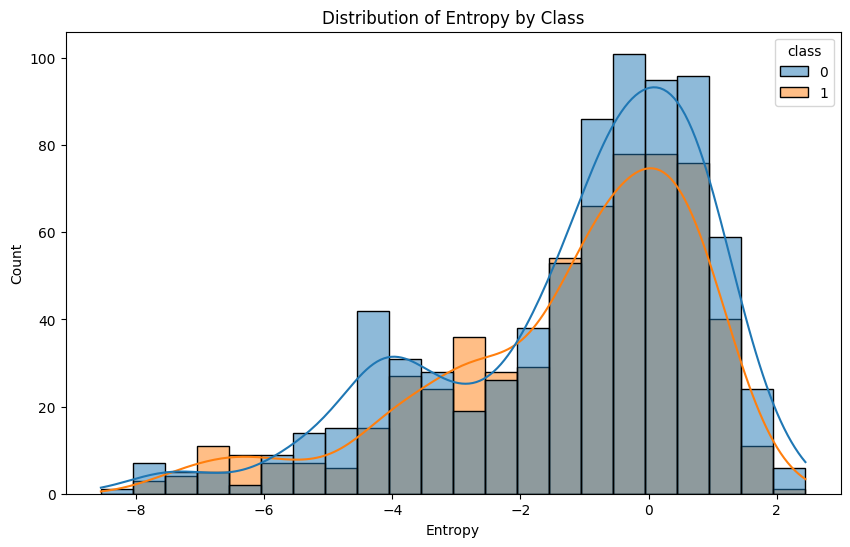

In [20]:
# Assume 'entropy' is one of your features and 'class' is the target variable
# Plotting the distribution of 'entropy' by class
plt.figure(figsize=(10,6))
sns.histplot(data=banknote, x='entropy', hue='class', kde=True)
plt.title('Distribution of Entropy by Class')
plt.xlabel('Entropy')
plt.ylabel('Count')
plt.show()

The histogram shows the distribution of the entropy feature, with separate colors for each class. We can observe that the entropy values are more concentrated in distinct ranges for each class, indicating a clear separation between the two classes based on entropy.

## 5. Correlation Matrix

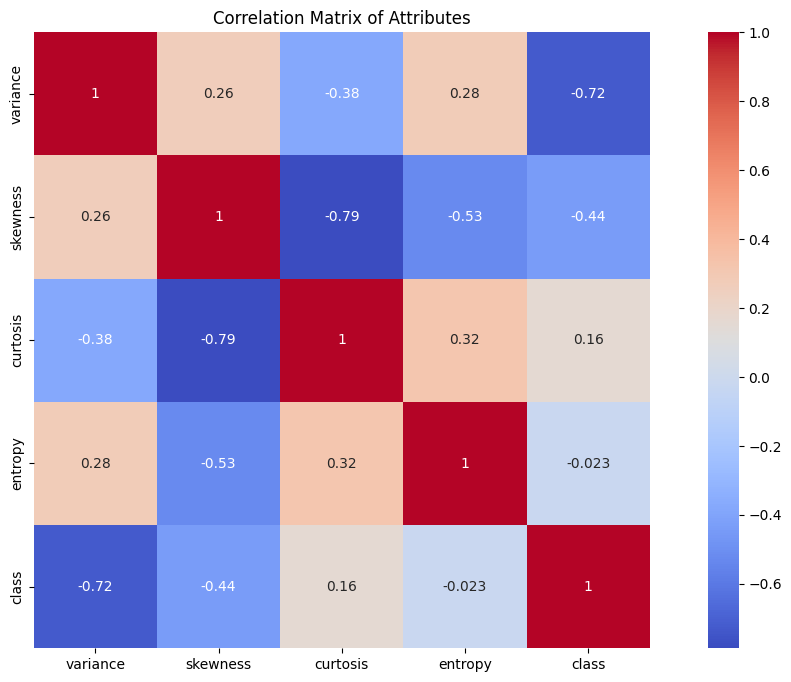

In [21]:
# Calculate the correlation matrix
corr = banknote[["variance", "skewness", "curtosis", "entropy", "class"]].corr()

# Set up the figure and axes for the heatmap
fig, ax = plt.subplots(figsize=(15, 8))

# Create the heatmap
sns.heatmap(corr, annot=True, annot_kws={'size':10}, cmap='coolwarm', square=True)

# Set the title for the plot
ax.set_title('Correlation Matrix of Attributes')
plt.show()


The correlation matrix heatmap reveals that variance has a strong positive correlation with the target variable class, indicating that higher variance values are associated with one of the classes. Conversely, skewness, curtosis, and entropy show varying degrees of correlation with class, which suggests that these features may also contribute to predicting the class. Overall, this visualization highlights the relationships between the features and the target variable, aiding in feature selection for the logistic regression model.

## 6. Data Preprocessing

### 6.1 Getting Inputs and Outputs

In [22]:
X = banknote.iloc[:, :-1].values  # All features except the last column (class)
y = banknote.iloc[:, -1].values  # Target variable (class)

In [23]:
print("Input Features (X):")
print(X)

Input Features (X):
[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]


In [24]:
print("\nTarget Variable (y):")
print(y)  


Target Variable (y):
[0 0 0 ... 1 1 1]


### 6.2 Creating Training Set and Test Set

In [25]:
# Split the Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
print("\nTraining Features (X_train):")
print(X_train)


Training Features (X_train):
[[-1.2943    2.6735   -0.84085  -2.0323  ]
 [-0.40857   3.0977   -2.9607   -2.6892  ]
 [-1.5228   -6.4789    5.7568    0.87325 ]
 ...
 [ 0.6005    0.99945  -2.2126    0.097399]
 [ 2.0165   -0.25246   5.1707    1.0763  ]
 [-2.0759   10.8223    2.6439   -4.837   ]]


In [27]:
print("\nTest Features (X_test):")
print(X_test)


Test Features (X_test):
[[ -1.7713   -10.7665    10.2184    -1.0043  ]
 [  5.1321    -0.031048   0.32616    1.1151  ]
 [ -2.0149     3.6874    -1.9385    -3.8918  ]
 ...
 [ -2.1652     3.0211    -2.4132    -2.4241  ]
 [  0.48797    3.5674    -4.3882    -3.8116  ]
 [ -4.3667     6.0692     0.57208   -5.4668  ]]


In [28]:
print("\nTraining Target (y_train):")
print(y_train)


Training Target (y_train):
[1 1 1 ... 1 0 0]


In [29]:
print("\nTest Target (y_test):")
print(y_test)


Test Target (y_test):
[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1]


### 6.3 Feature Scaling

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [31]:
print("\nScaled Training Features:")
print(X_train)


Scaled Training Features:
[[-0.60234962  0.13706318 -0.52441296 -0.41116219]
 [-0.291035    0.21026408 -1.02368742 -0.72585061]
 [-0.68266235 -1.4422953   1.02948859  0.98074362]
 ...
 [ 0.06363093 -0.15181461 -0.8474923   0.60907164]
 [ 0.5613238  -0.36784698  0.89144827  1.07801487]
 [-0.87706484  1.54323822  0.29632752 -1.75475574]]


### 6.4 Evaluating Feature Importance in Logistic Regression

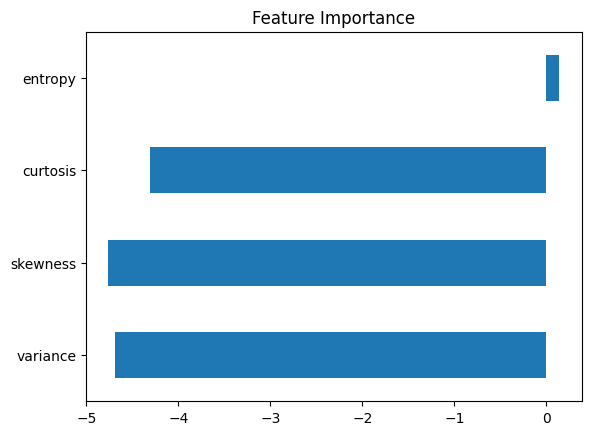

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

importance = model.coef_[0]
feature_importance = pd.Series(importance, index=banknote.columns[:-1])
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.show()


The resulting bar plot displays the importance of each feature in predicting the class labels of the banknote dataset. Each bar represents the coefficient value of a feature in the logistic regression model, indicating its contribution to the prediction. Features with higher absolute coefficient values have a more significant impact on the model's decision-making process, while those with values closer to zero have less influence. This visualization helps identify which features are most critical for distinguishing between authentic and forged banknotes.

## 7. Building and Training the Model

### 7.1 Building the Model

In [33]:
model = LogisticRegression(random_state=0)

### 7.2 Training the Model

In [34]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### 7.2 Inference: Making Predictions on the Test Set

In [35]:
y_pred = model.predict(scaler.transform(X_test))

In [36]:
print("Predicted Target Values (y_pred):")
print(y_pred)

Predicted Target Values (y_pred):
[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1]


### 7.3 Making Prediction of a Single Data Point

In [37]:
model.predict(scaler.transform([[0.5, 0.0, -2.0, -1.0]]))

array([1])

In [38]:
# Input the banknote features
variance_input = 0.5
skewness_input = 0.0
kurtosis_input = -2.0
entropy_input = -1.0

# Create an array with the input values
banknote_features = [[variance_input, skewness_input, kurtosis_input, entropy_input]]

# Predict using the model and scale the input
prediction = model.predict(scaler.transform(banknote_features))

# Output the prediction
print(f"Prediction for the banknote features: {prediction[0]}")

# Interpretation
if prediction[0] == 0:
    print("The banknote is predicted to be Forged.")
else:
    print("The banknote is predicted to be Authentic.")

Prediction for the banknote features: 1
The banknote is predicted to be Authentic.


## 8. Evaluating the Model

### 8.1 Confusion Matrix

In [39]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[154   3]
 [  0 118]]


### 8.2 Accuracy

In [40]:
# Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.9890909090909091


In [41]:
# Calculating Accuracy
(154+118)/(154+3+0+118)

0.9890909090909091

In [42]:
# Model Coefficients
print('Model coefficients :',model.coef_)

# Model Intercept Value
print('Model intercept value :',model.intercept_)

Model coefficients : [[-4.69085305 -4.75980521 -4.30952127  0.13958247]]
Model intercept value : [-1.40340106]


## 9. Visualization

### 9.1 Visualizing the Confusion Matrix

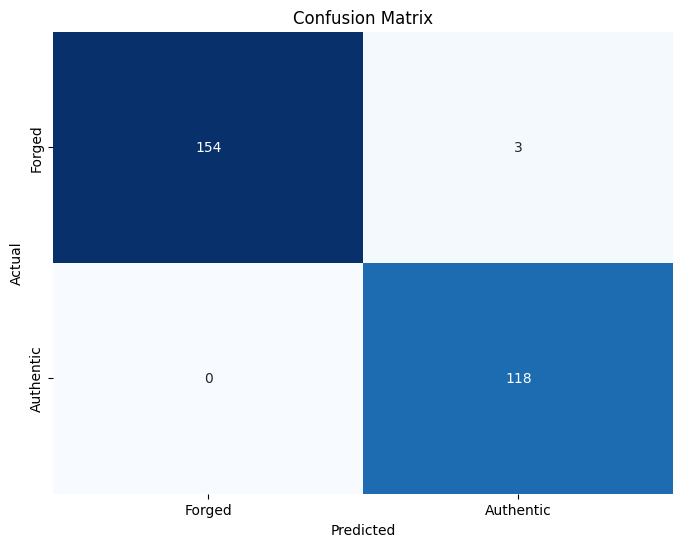

In [43]:
#size of the figure
plt.figure(figsize=(8, 6)) 

#Visualizing the Confusion Matrix with a Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Forged', 'Authentic'], yticklabels=['Forged', 'Authentic']) 

# Labeling the Plot
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

The heatmap displays the confusion matrix for the banknote authentication model:
- Diagonal Values: The counts for correctly classified instances (e.g., Authentic predicted as Authentic and Forged predicted as Forged) indicate successful predictions.
- Off-Diagonal Values: The misclassifications (e.g., Forged predicted as Authentic) show how many instances were incorrectly identified.
- Color Intensity: Darker colors represent higher counts, allowing for a quick visual assessment of model performance.

This visualization highlights the model's ability to distinguish between forged and authentic banknotes, revealing both its accuracy and areas for improvement.

## 10. Interpretation

### 10.1 Model Coefficients

In [44]:
# Get coefficients for the features
coefficients = model.coef_[0]  # Only the first row, as it's binary classification

# Define feature names manually if X_train was a NumPy array
features = ['variance', 'skewness', 'kurtosis', 'entropy']

# Create a DataFrame to display feature importance
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print("Feature importance:\n", coef_df)


Feature importance:
     Feature  Coefficient
0  variance    -4.690853
1  skewness    -4.759805
2  kurtosis    -4.309521
3   entropy     0.139582


### 10.2 Interpretation of Results

In [45]:
print("\nModel Interpretation:")
print("The logistic regression model has an accuracy of {:.2f}% on the test set.".format(accuracy * 100))
print("The confusion matrix indicates how many of the actual classes were correctly classified.")
print("Each coefficient represents the change in the log odds of the target variable for a one-unit change in the predictor variable.")
print("A positive coefficient indicates that as the predictor increases, the likelihood of the target class being 1 (e.g., Authentic) increases.")
print("Conversely, a negative coefficient indicates that as the predictor increases, the likelihood of the target class being 0 (e.g., Forged) increases.")


Model Interpretation:
The logistic regression model has an accuracy of 98.91% on the test set.
The confusion matrix indicates how many of the actual classes were correctly classified.
Each coefficient represents the change in the log odds of the target variable for a one-unit change in the predictor variable.
A positive coefficient indicates that as the predictor increases, the likelihood of the target class being 1 (e.g., Authentic) increases.
Conversely, a negative coefficient indicates that as the predictor increases, the likelihood of the target class being 0 (e.g., Forged) increases.
